# Week3 - Homework

Write a rule based predictor for the dataset below.

Choose one of the following datasets and do your EDA.
Test your assumptions.

Finally write your code in `predict_one` function.

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
# in_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/in_names.csv'

df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27999 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    27999 non-null  object
 1   gender  27999 non-null  object
dtypes: object(2)
memory usage: 656.2+ KB


In [82]:
df.gender.value_counts()

gender
M    14000
F    13999
Name: count, dtype: int64

### Two examples:

In [83]:
df.sample(10)

,name,gender
9804,marinell,F
1111,domnick,M
17186,dontarius,M
10941,souline,F
6687,jiles,M
15829,columba,F
12217,diya,F
17875,waqas,M
1351,chandler,M
26700,nivia,F


In [84]:
df.shape

(27999, 2)

In [85]:
df['is_last_letter_vowel'] = [ 'aeiou'.find(name[-1])>0 for name in df.name]

<Axes: xlabel='is_last_letter_vowel', ylabel='count'>

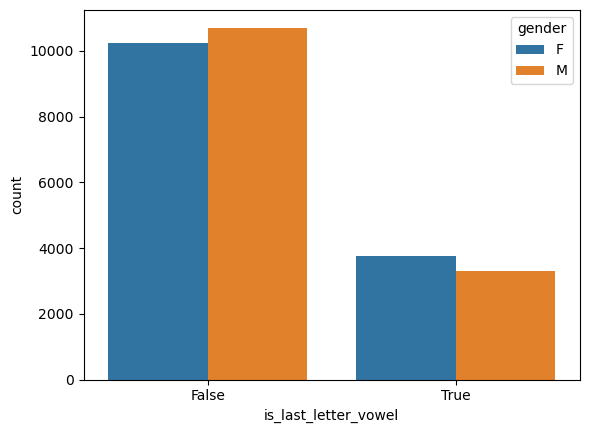

In [86]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

It looks like last letter is being a vowel is not a good indicator for this dataset!

<Axes: xlabel='len', ylabel='count'>

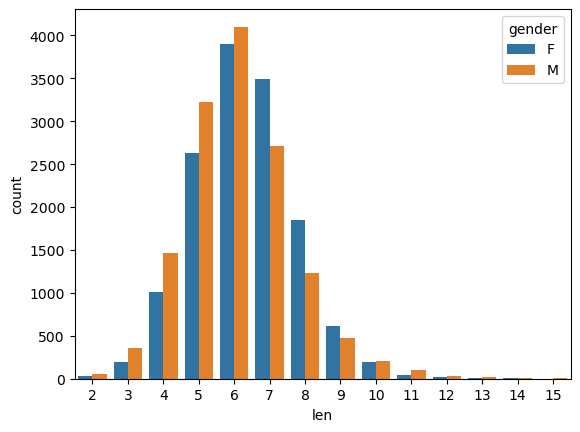

In [87]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

<Axes: xlabel='first_letter', ylabel='count'>

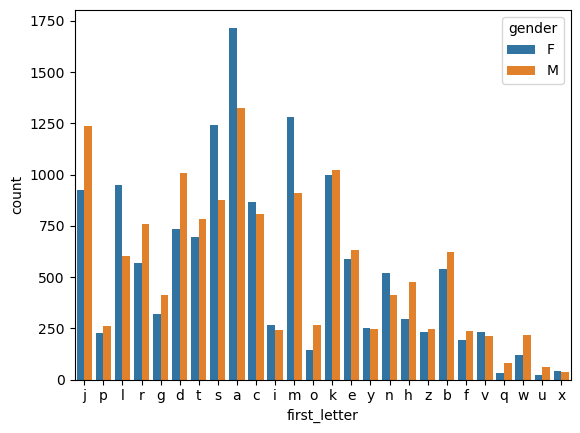

In [89]:
df['first_letter'] = [name[0] for name in df['name']]
sns.countplot(data=df, x='first_letter', hue='gender')

we can't relly determine a valid classification from the letter that the name starts

<Axes: xlabel='last_letter', ylabel='count'>

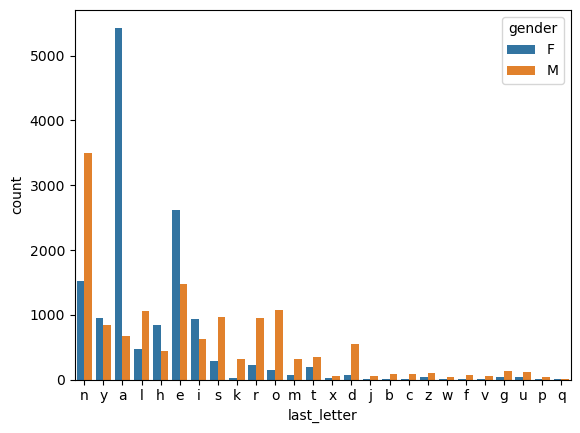

In [90]:
df['last_letter'] = [name[-1] for name in df['name']]
sns.countplot(data=df, x='last_letter', hue='gender')

this gives some clear information about maximum female names ending with a and male names ending with n

<Axes: xlabel='last_three', ylabel='count'>

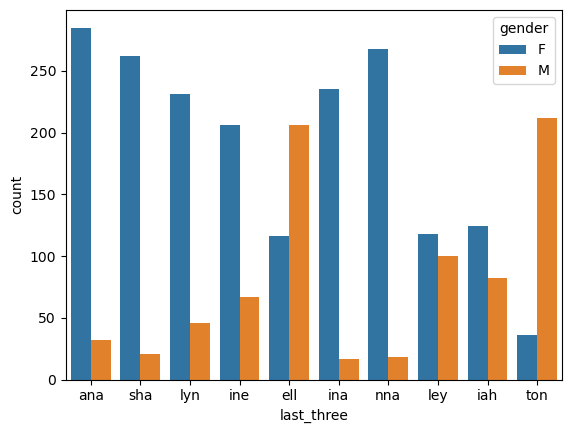

In [92]:
df['last_three'] = [name[-3:] for name in df['name']]

top_last_three = df['last_three'].value_counts().nlargest(10).index
top_last_three_df = df[df['last_three'].isin(top_last_three)]
sns.countplot(data=top_last_three_df, x='last_three', hue='gender')

<Axes: xlabel='last_four', ylabel='count'>

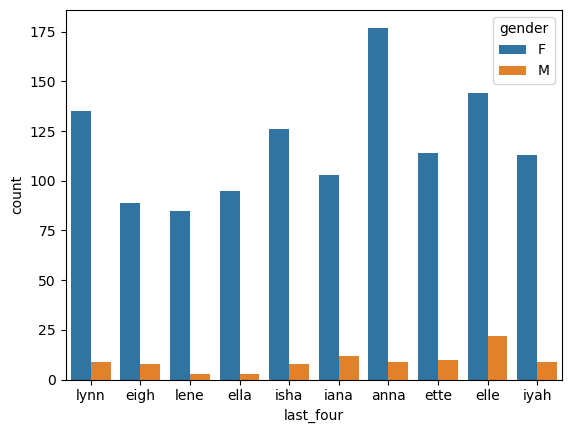

In [93]:
df['last_four'] = [name[-4:] for name in df['name']]

top_last_four = df['last_four'].value_counts().nlargest(10).index
top_last_four_df = df[df['last_four'].isin(top_last_four)]
sns.countplot(data=top_last_four_df, x='last_four', hue='gender')

In [96]:
def predict_one(name): # DON'T CHANGE THIS LINE
    if name.endswith(('a', 'e', 'i', 'y', 'h', 'lyn','lynn')):
        return 'F'
    else:
        return 'M'
    
# Examples
print(predict_one('Jane'))
print(predict_one('Michael'))

F
M


In [97]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7513125468766741
